In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from costs import *
from models import *
from helpers import *
from build import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

# Exploratory Data Analysis

Here in this notebook, we will try to explore the data, following wikipedia page and some other web help (that we will listed below) to understand better what represent each feature and how we can use it.

https://en.wikipedia.org/wiki/Exploratory_data_analysis

In [9]:
stX, meanX, stdX = standardize(tX)
stX = np.delete(stX, [0], axis=1)# i don't know why, standardize add a first row of ones...
stX

array([[ 0.48528033,  0.03965436,  0.40651625, ...,  1.54863904,
         1.5407369 ,  0.39818214],
       [ 0.67601018,  0.63344061,  1.05925506, ..., -0.64686729,
        -0.64686766, -0.23179611],
       [ 0.3724594 , -0.64151886, -0.37784339, ..., -0.64686729,
        -0.64686766, -0.10829837],
       ..., 
       [ 0.49445625, -1.22366112,  0.43998942, ..., -0.64686729,
        -0.64686766,  0.23416077],
       [ 0.34254595, -0.11217409, -0.50441304, ..., -0.64686729,
        -0.64686766, -0.41106251],
       [ 0.46533331, -1.31829705, -0.3187276 , ..., -0.64686729,
        -0.64686766, -0.22539659]])

In [10]:
def pretty_print(matrix):
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    
def transpose(matrix):
    return zip(*matrix)





In [11]:
def features_label():
    # label names
    labels = load_header(DATA_TRAIN_PATH)
    labels = labels[range(2, labels.size)] # do not load "ID" and "Prediction" label
    return labels

def five_numbers_summary(tX):
    """ get the label and the five number summary of each features """

    # maximum
    maximums = np.amax(tX, axis=0)
    # minimum
    minimums = np.amin(tX, axis=0)
    # lower quartile
    low_quartile = np.percentile(tX, 25, axis = 0)
    # median
    median = np.median(tX, axis = 0)
    # upper quartile
    high_quartile = np.percentile(tX, 75, axis = 0)
    
    # transpose matrix and add label
    table = np.array([minimums, low_quartile, median, high_quartile, maximums]).T
    return table

def print_five_numbers_summary(tX):
    # label names
    labels = load_header(DATA_TRAIN_PATH)
    labels = labels[range(2, labels.size)] # do not load "ID" and "Prediction" label
    # maximum
    maximums = np.amax(tX, axis=0)
    # minimum
    minimums = np.amin(tX, axis=0)
    # lower quartile
    low_quartile = np.percentile(tX, 25, axis = 0)
    # median
    median = np.median(tX, axis = 0)
    # upper quartile
    high_quartile = np.percentile(tX, 75, axis = 0)
    
    # transpose matrix and add label
    table = np.array([labels, minimums, low_quartile, median, high_quartile, maximums])
    table = transpose(table)
    pretty_print(table)
        
five_numbers_summary(tX)
print("-------------")
print_five_numbers_summary(stX)

-------------
DER_mass_MMC               	-2.206834712283936 	0.33326412575063086	0.40247460802236384  	0.4635807227527753 	2.471095932655901 
DER_mass_transverse_met_lep	-1.4342232170364366	-0.8592300228858561	-0.055937632477299784	0.6885212317001402 	5.882081796113722 
DER_mass_vis               	-1.7290958517239343	-0.5364481856294704	-0.1843636585579034  	0.272635677136513  	13.956912707432172
DER_pt_h                   	-0.9113538283416112	-0.7114253187551678	-0.3049890591461679  	0.35966547180782005	8.412795071971425 
DER_deltaeta_jet_jet       	-0.6468677996079117	-0.6468677996079117	-0.6468677996079117  	1.5418106470606967 	1.5571477569756136
DER_mass_jet_jet           	-0.6125038821536457	-0.6125038821536457	-0.6125038821536457  	1.0356353864235985 	5.55554038630215  
DER_prodeta_jet_jet        	-0.6468631371607187	-0.6468631371607187	-0.6468631371607187  	1.538417033729456  	1.5810929004293213
DER_deltar_tau_lep         	-2.6766810417471727	-0.71593723601482  	0.1487346821788

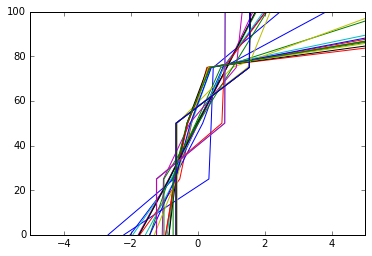

In [12]:
def plot_five_numbers(tX):
    y = [0, 25, 50, 75, 100]
    for i in range(tX.shape[0]):
        plt.plot(tX[i], y)
    plt.axis([-5, 5, 0, 100])
    plt.show()
    
five = five_numbers_summary(stX)
plot_five_numbers(five)
    

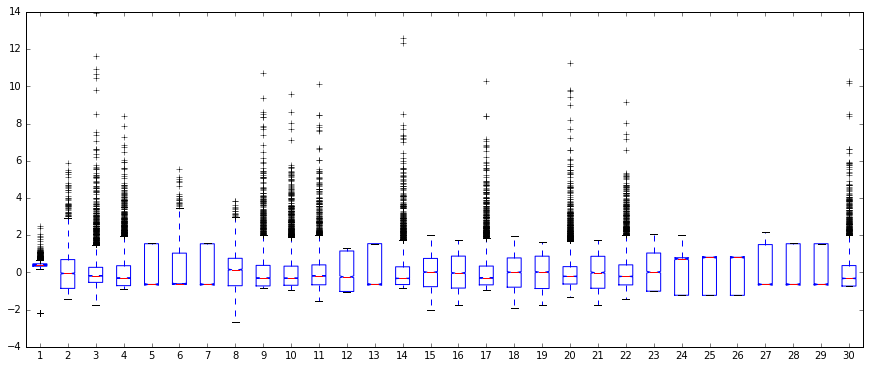

In [13]:
def boxplot_five_number(stX, labels):
    fig = plt.figure(figsize=(15, 6))
    plt.boxplot(stX, labels)
    plt.show
    
lab = list(features_label())
lab = [' ', lab]

boxplot_five_number(stX, lab)

There are a LOTS of outliers. My assumption is that they come from "noisy" detectors, so we could, for a first try, just let them appart and work only with the clean feature, to see how it improves our prediction.

In [14]:
clean_features = [5, 7, 12, 13, 15, 16, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29]